In [ ]:
# Q1
#1. Why is the Gini a good loss function for categorical target variables?
    # The gini index is between 0 and 1, where 0 means our model is pure and 1 means impure. We want to have a lower gini for a purer model, so it is a good loss function because it shows us where to split our model. #https://blog.quantinsti.com/gini-index/
#2. Why do trees tend to overfit, and how can this tendency be constrained?
    # If you take a bunch of data and ask 50 questions to determine if they are married or divorced, for example, all the 50 questions will be correlating with each other and the tree will overfit. Trees will make splits on very fine distinctions, so they tend to overfit because they get distracted by the noise of the data. This tendency could be constrained by truncating the tree and limiting its depth, impose a lower bound on the impurity that can appear at a terminal node (don't allow terminal nodes to be too pure).
#3. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
    # False. A tree can still perform well with less categorical variables, but in general trees do better with more categorical variables as they do well with interactions.
#4. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
    #The branches are split automatically into only two, true go one way, false go the other. Thus, we only need two branches for those decisions.
#5. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?
    #Looking at our gini value to see if it is high or looking to see if our training dataset has representative data, or checking to see how many constraints we have (too much or too little), because trees are greedy, they are prone to overfitting. Underfitting would be when constraints are too simple or strict. #https://www.geeksforgeeks.org/machine-learning/overfitting-in-decision-tree-models/

In [26]:
# Q2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/Breast Cancer METABRIC.csv')

In [27]:
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [28]:
df.shape
# 34 columsn and 2509 observations

(2509, 34)

In [56]:
# Q2: 2
allvars=['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis','Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed', "Patient's Vital Status"]
subset = df.loc[:, allvars].dropna()
y = subset["Patient's Vital Status"]
subset.head()

cat_cols=['Tumor Stage','Chemotherapy','Cancer Type Detailed']
num_cols=['Tumor Size','Lymph nodes examined positive','Age at Diagnosis']

encoded=pd.get_dummies(subset[cat_cols], dtype='int', drop_first=True)
print(encoded)

      Tumor Stage  Chemotherapy_Yes  \
0             2.0                 0   
1             1.0                 0   
2             2.0                 1   
3             2.0                 1   
4             2.0                 1   
...           ...               ...   
1698          1.0                 0   
1700          1.0                 0   
1702          2.0                 1   
1707          2.0                 1   
1743          2.0                 0   

      Cancer Type Detailed_Breast Invasive Ductal Carcinoma  \
0                                                     1       
1                                                     1       
2                                                     1       
3                                                     0       
4                                                     0       
...                                                 ...       
1698                                                  0       
1700                       

In [61]:
X = pd.concat([subset[num_cols].reset_index(drop=True),encoded.reset_index(drop=True)], axis=1)
X.tail()

,Tumor Size,Lymph nodes examined positive,Age at Diagnosis,Tumor Stage,Chemotherapy_Yes,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer
1394,20.0,0.0,70.65,1.0,0,0,0,0,1,0,0
1395,20.0,0.0,75.62,1.0,0,1,0,0,0,0,0
1396,20.0,6.0,52.84,2.0,1,0,0,0,1,0,0
1397,30.0,1.0,48.59,2.0,1,1,0,0,0,0,0
1398,22.0,0.0,63.20,2.0,0,0,0,1,0,0,0


In [67]:

from sklearn.model_selection import train_test_split



## Split the Sample into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

from sklearn import tree

cart = tree.DecisionTreeClassifier(min_samples_leaf=10) # No pruning
#cart = tree.DecisionTreeClassifier(min_samples_leaf = 7) # Control min leaf size
#cart = tree.DecisionTreeClassifier(min_impurity_decrease= .1) # Control min impurity. A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

## Make Predictions on the Test Set:
cart = cart.fit(X_train, y_train) # Fit the classifier
y_hat = cart.predict(X_test)

## Confusion Matrix:
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = np.trace(tab)/len(y_test) # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

Accuracy:  0.5035714285714286 



col_0,Died of Disease,Died of Other Causes,Living
Patient's Vital Status,,,
Died of Disease,34,16,36
Died of Other Causes,19,28,17
Living,37,14,79


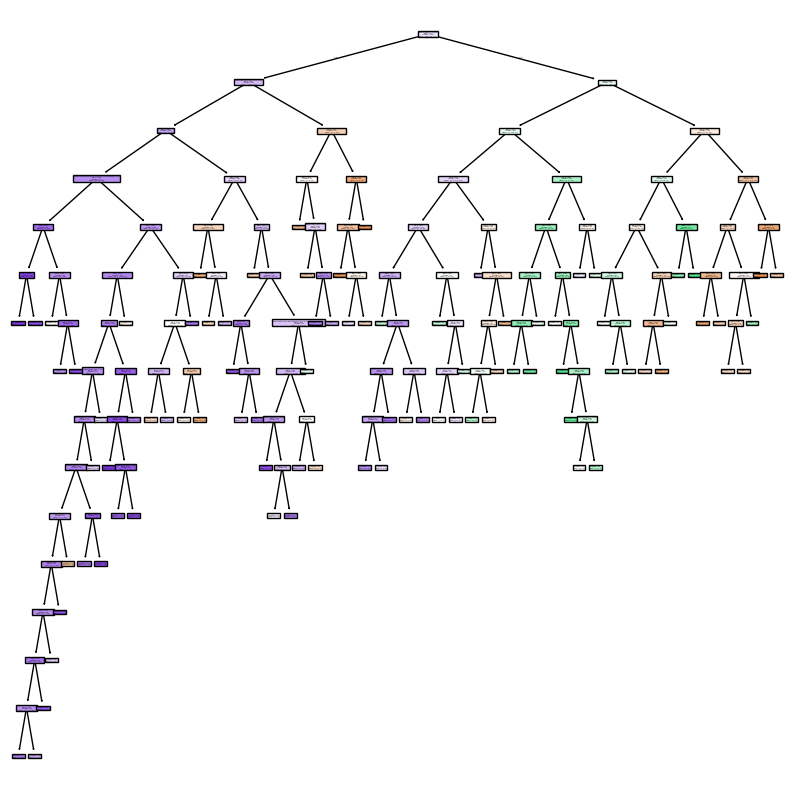

In [68]:
from sklearn.tree import plot_tree
# Visualize results:
plt.figure(figsize=(10,10))
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names) 
plt.show()